<a href="https://colab.research.google.com/github/uuuuju/Audio-Data-Augmentation/blob/main/Audio_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import random
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
file_name = "/content/drive/My Drive/053.wav"

In [18]:
def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    fig, ax = plt.subplots(nrows=2)
    librosa.display.waveplot(signal, sr=sr, ax=ax[0])
    ax[0].set(title="Original signal")
    librosa.display.waveplot(augmented_signal, sr=sr, ax=ax[1])
    ax[1].set(title="Augmented signal")
    plt.show()

ADDING WHITE NOISE


In [16]:
def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

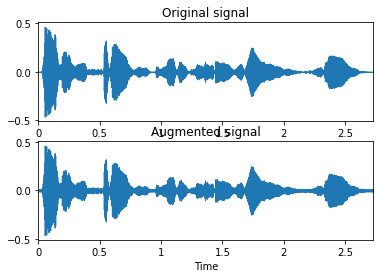

In [46]:
if __name__ == "__main__":
    signal, sr = librosa.load("/content/drive/My Drive/053.wav")
    augmented_signal = add_white_noise(signal, 0.1)
    sf.write("augmented_audio.wav", augmented_signal, sr)
    _plot_signal_and_augmented_signal(signal, augmented_signal, sr)

TIME STRETCH

In [32]:
def time_stretch(signal, time_stretch_rate):
    """Time stretching implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.time_stretch(signal, time_stretch_rate)


In [37]:
def _plot_signal_and_stretched_signal(signal, stretched_signal, sr):
    fig, ax = plt.subplots(nrows=2)
    librosa.display.waveplot(signal, sr=sr, ax=ax[0])
    ax[0].set(title="Original signal")
    librosa.display.waveplot(stretched_signal, sr=sr, ax=ax[1])
    ax[1].set(title="Stretched signal")
    plt.show()

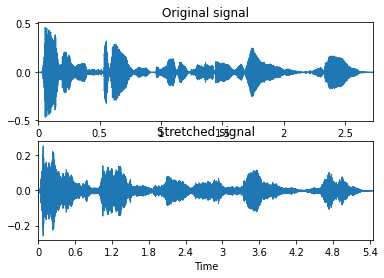

In [47]:
if __name__ == "__main__":
    signal, sr = librosa.load("/content/drive/My Drive/053.wav")
    stretched_signal = time_stretch(signal, 0.5)
    sf.write("stretched_audio.wav", stretched_signal, sr)
    _plot_signal_and_stretched_signal(signal, stretched_signal, sr)

PITCH SCALING

In [39]:
def pitch_scale(signal, sr, num_semitones):
    """Pitch scaling implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.pitch_shift(signal, sr, num_semitones)

In [49]:
def _plot_signal_and_higher_pitch_signal(signal, higher_pitch_signal, sr):
    fig, ax = plt.subplots(nrows=2)
    librosa.display.waveplot(signal, sr=sr, ax=ax[0])
    ax[0].set(title="Original signal")
    librosa.display.waveplot(higher_pitch_signal, sr=sr, ax=ax[1])
    ax[1].set(title="Higher Pitch signal")
    plt.show()

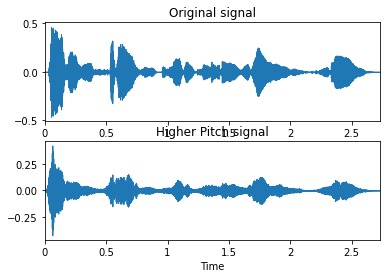

In [50]:
if __name__ == "__main__":
    signal, sr = librosa.load("/content/drive/My Drive/053.wav")
    higher_pitch_signal = pitch_scale(signal,sr, 2)
    sf.write("higher_pitch_audio.wav", higher_pitch_signal, sr)
    _plot_signal_and_higher_pitch_signal(signal, higher_pitch_signal, sr)

AMPLITUDE SCALING

In [54]:
def random_gain(signal, min_factor=0.1, max_factor=0.12):
    gain_rate = random.uniform(min_factor, max_factor)
    louder_signal = signal * gain_rate
    return louder_signal

In [52]:
def _plot_signal_and_louder_signal(signal, louder_signal, sr):
    fig, ax = plt.subplots(nrows=2)
    librosa.display.waveplot(signal, sr=sr, ax=ax[0])
    ax[0].set(title="Original signal")
    librosa.display.waveplot(louder_signal, sr=sr, ax=ax[1])
    ax[1].set(title="louder signal")
    plt.show()

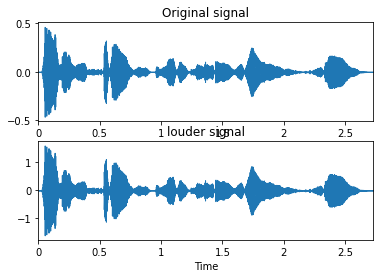

In [55]:
if __name__ == "__main__":
    signal, sr = librosa.load("/content/drive/My Drive/053.wav")
    louder_signal = random_gain(signal,2 ,4)
    sf.write("louder_audio.wav", louder_signal, sr)
    _plot_signal_and_louder_signal(signal, louder_signal, sr)